In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
census_df=pd.read_csv('census.csv')
census_df

,Age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital_loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
census_df.shape

(48842, 15)

In [5]:
census_df.describe()

,Age,fnlwgt,education-num,capital-gain,capital_loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
census_df.isnull().sum()


Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital_loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
for i in census_df.columns:
    print(i,"--> Missing values are",census_df.loc[census_df[i]=="?",i])

Age --> Missing values are Series([], Name: Age, dtype: int64)
workclass --> Missing values are 27       ?
61       ?
69       ?
77       ?
106      ?
        ..
48682    ?
48769    ?
48800    ?
48812    ?
48838    ?
Name: workclass, Length: 2799, dtype: object
fnlwgt --> Missing values are Series([], Name: fnlwgt, dtype: int64)
education --> Missing values are Series([], Name: education, dtype: object)
education-num --> Missing values are Series([], Name: education-num, dtype: int64)
marital_status --> Missing values are Series([], Name: marital_status, dtype: object)
occupation --> Missing values are 27       ?
61       ?
69       ?
77       ?
106      ?
        ..
48682    ?
48769    ?
48800    ?
48812    ?
48838    ?
Name: occupation, Length: 2809, dtype: object
relationship --> Missing values are Series([], Name: relationship, dtype: object)
race --> Missing values are Series([], Name: race, dtype: object)
sex --> Missing values are Series([], Name: sex, dtype: object)
capital-gai

In [9]:
#checking whether occupuational values are nul for all values of workclass.

In [10]:
combined_null=census_df.loc[((census_df["occupation"]=='?')&(census_df['workclass']=="?")),:]
len(combined_null)

2799

In [11]:
#above result signifies that if workclass is null, the corresponding occupation is also null

In [12]:
   for col in ['workclass', 'occupation', 'native-country']:
        census_df[col].replace("?",census_df[col].mode()[0], inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

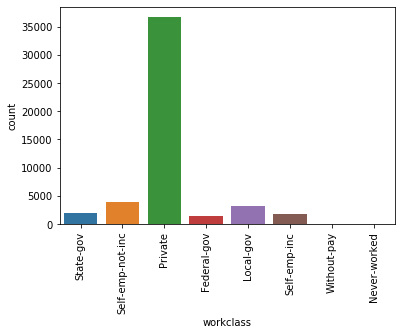

In [13]:
sns.countplot(x ='workclass', data = census_df)
plt.xticks(rotation=90)

In [14]:
census_df.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital_loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [15]:
census_df['Income'].value_counts()

<=50K    37155
>50K     11687
Name: Income, dtype: int64

In [16]:
#Income dtype is OBJECT . so we need to convert it into integer so that we can draw the barplots of income with other string varibles

In [17]:
census_df['Income']=census_df['Income'].map({'<=50K': 0, '>50K': 1})

In [18]:
census_df["Income"].dtypes

dtype('int64')

In [19]:
census_df['Income'].value_counts()

0    37155
1    11687
Name: Income, dtype: int64

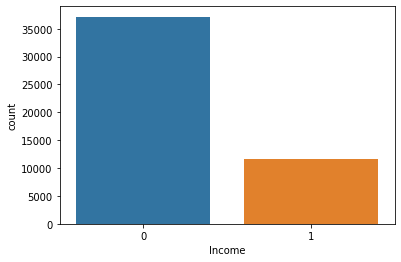

In [20]:
sns.countplot(x ='Income', data = census_df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

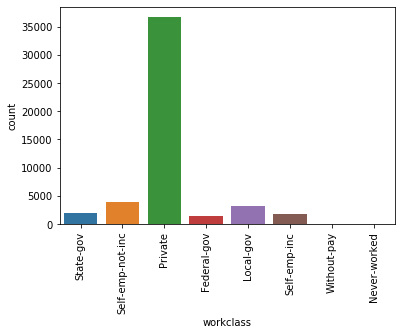

In [21]:
sns.countplot(x ='workclass', data = census_df)
plt.xticks(rotation=90)

In [22]:
census_df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

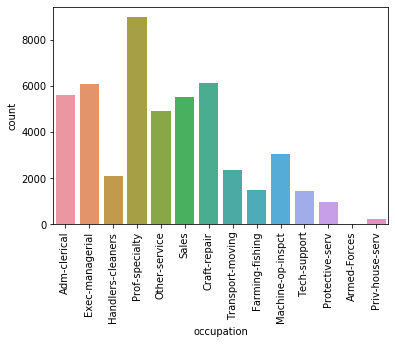

In [23]:
sns.countplot(x ='occupation', data = census_df)
plt.xticks(rotation=90)

In [24]:
census_df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [25]:
census_df.corr()

,Age,fnlwgt,education-num,capital-gain,capital_loss,hours-per-week,Income
Age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
Income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


In [26]:
census_df.skew()

Age                0.557580
fnlwgt             1.438892
education-num     -0.316525
capital-gain      11.894659
capital_loss       4.569809
hours-per-week     0.238750
Income             1.222216
dtype: float64

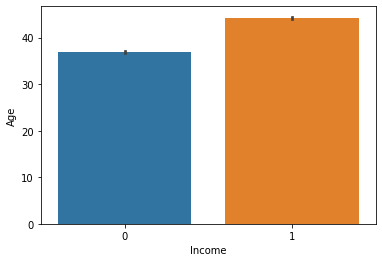

In [27]:
sns.barplot(x='Income',y="Age",data=census_df)

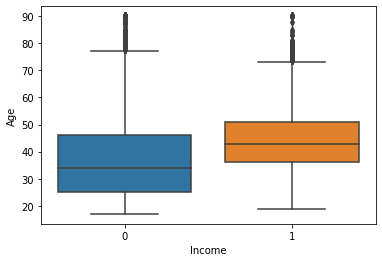

In [28]:
sns.boxplot(y ='Age', x ='Income', data = census_df)

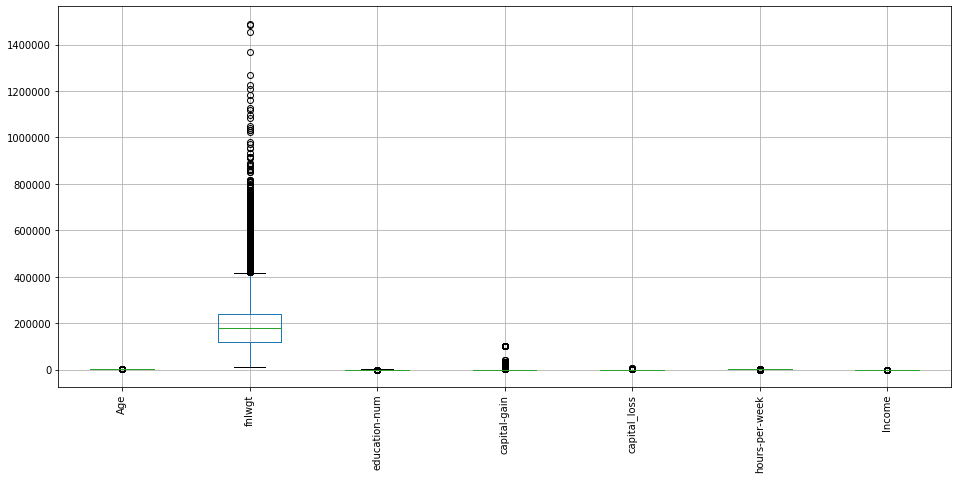

In [29]:
plt.figure(figsize=(16,7))
census_df.boxplot()
plt.xticks(rotation=90)
plt.show()

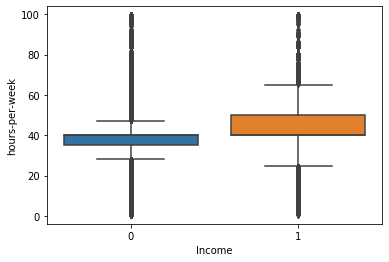

In [30]:
sns.boxplot(y ='hours-per-week', x ='Income', data = census_df)

In [31]:
census_df.dtypes


Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital_loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

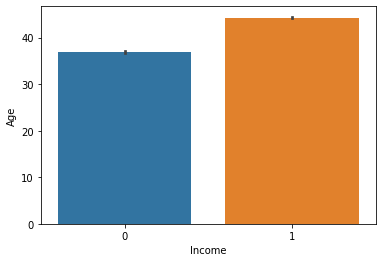

In [32]:

sns.barplot(x="Income",y="Age",data=census_df)


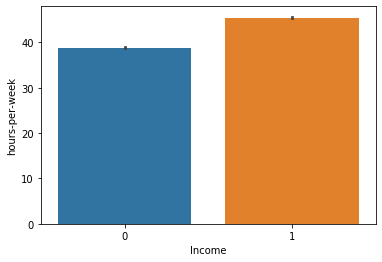

In [33]:
sns.barplot(x="Income",y="hours-per-week",data=census_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

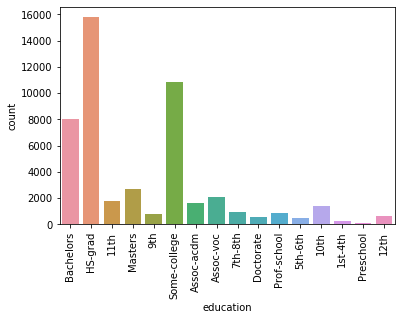

In [34]:
sns.countplot(census_df['education'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

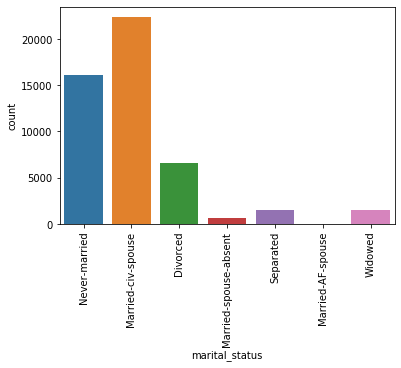

In [35]:
sns.countplot(census_df['marital_status'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

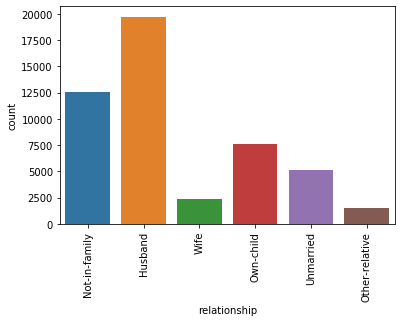

In [36]:
sns.countplot(census_df['relationship'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

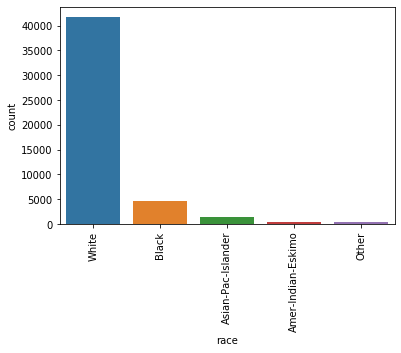

In [37]:
sns.countplot(census_df['race'])
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

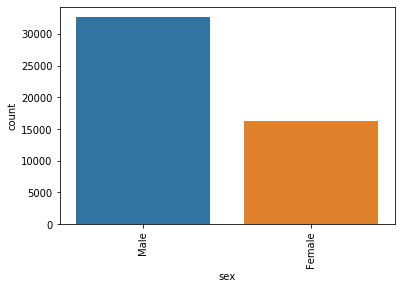

In [38]:
sns.countplot(census_df['sex'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

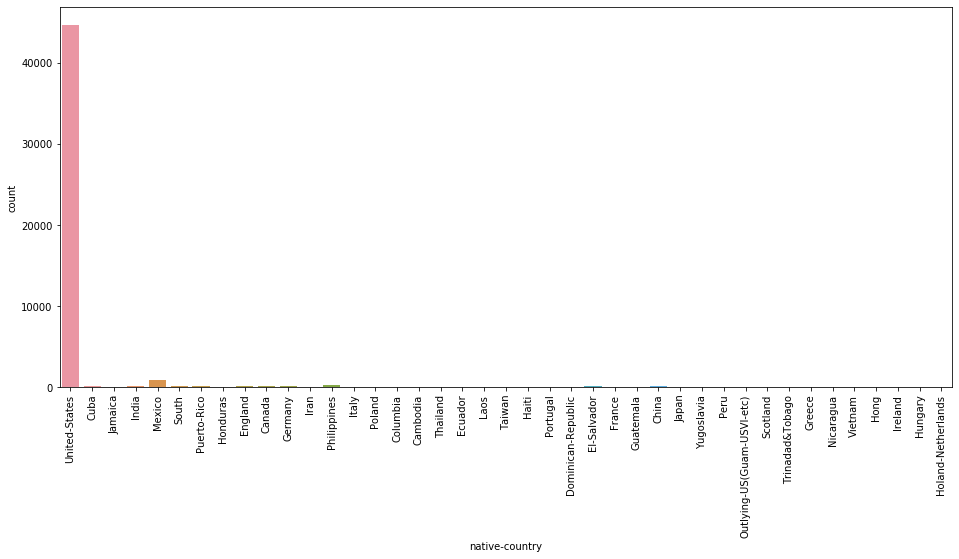

In [39]:
plt.figure(figsize=(16,7))
sns.countplot(census_df['native-country'])
plt.xticks(rotation=90)

In [40]:
census_df["native-country"].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

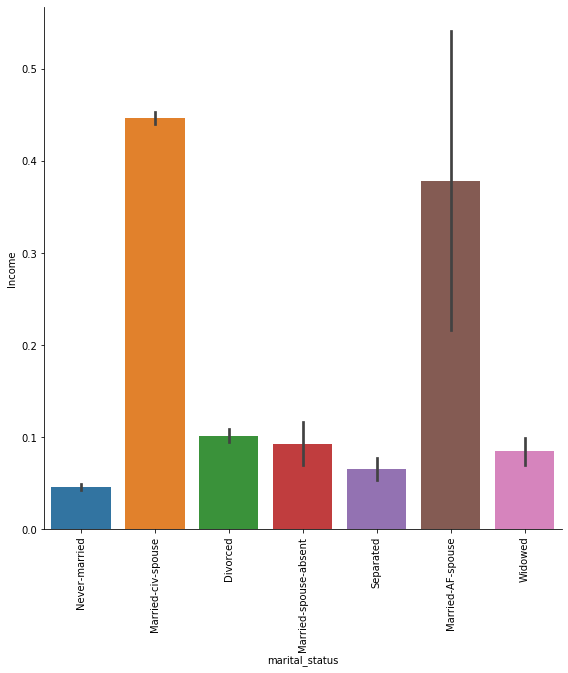

In [41]:
sns.catplot(x ='marital_status',y='Income',data=census_df,kind='bar',height=8)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

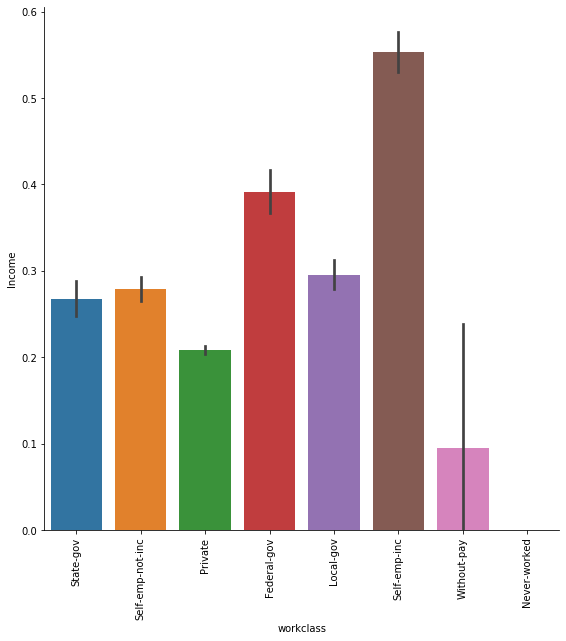

In [42]:
sns.catplot(x ='workclass',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

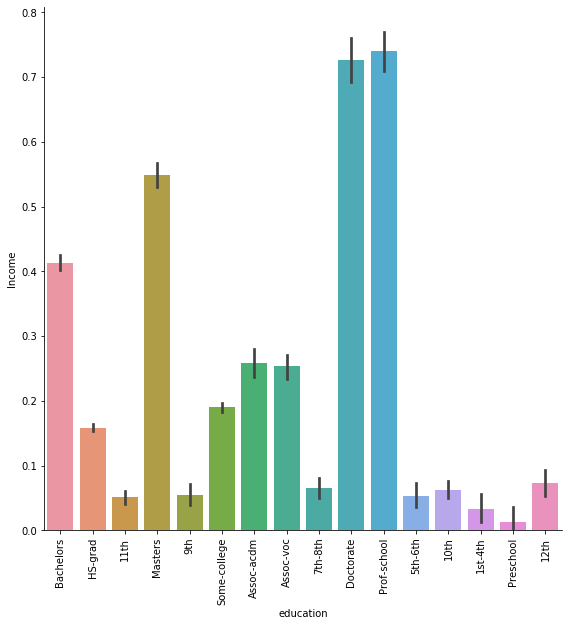

In [43]:
sns.catplot(x ='education',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

In [44]:
census_df.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital_loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

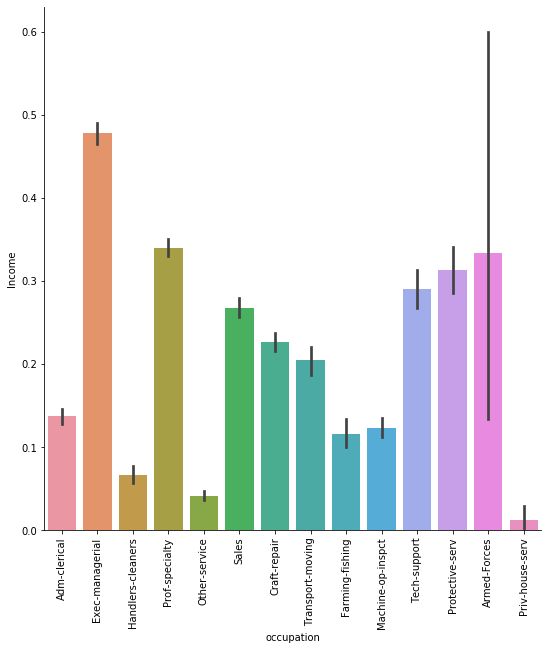

In [45]:
sns.catplot(x ='occupation',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

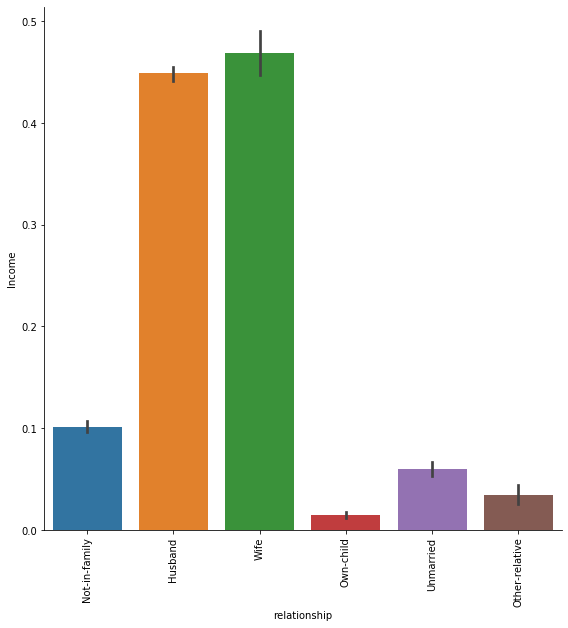

In [46]:
sns.catplot(x ='relationship',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

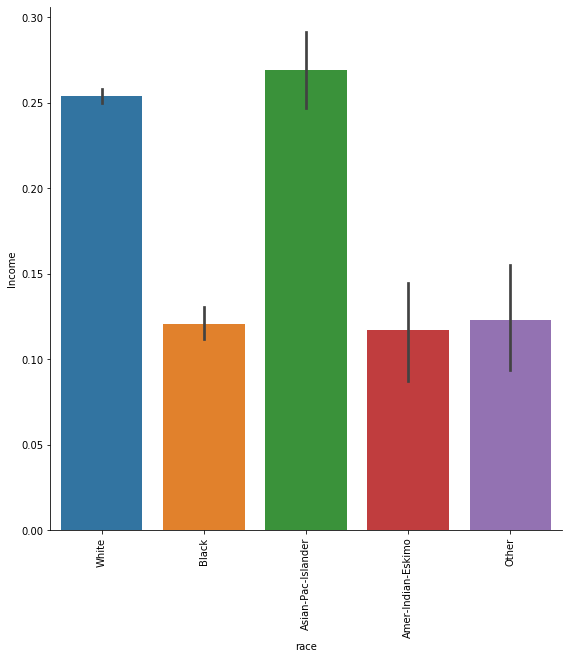

In [47]:
sns.catplot(x ='race',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

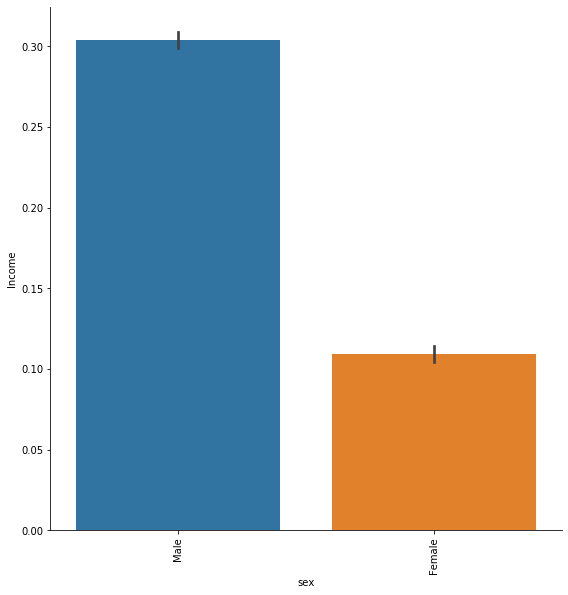

In [48]:
sns.catplot(x ='sex',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

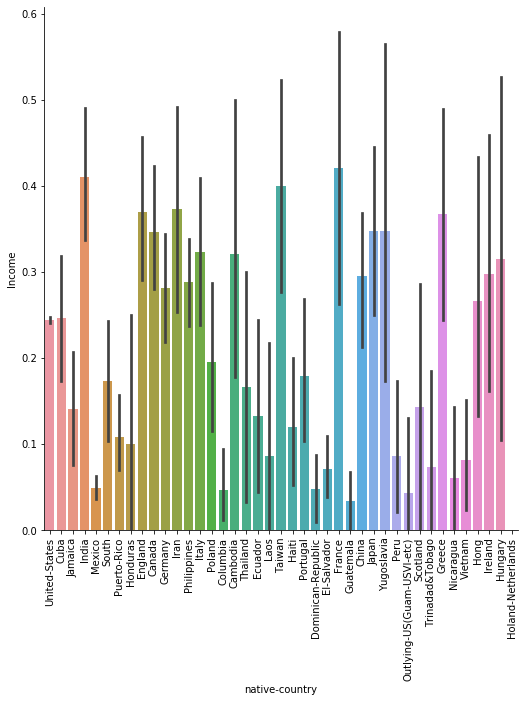

In [49]:
sns.catplot(x ='native-country',y='Income',data=census_df,kind='bar',height=8)
plt.xticks(rotation=90)

In [50]:
#dropping irrelevant columns

In [51]:
census_df.drop(['relationship','education','occupation','fnlwgt','native-country'],axis=1,inplace=True)

In [52]:
census_df.dtypes

Age                int64
workclass         object
education-num      int64
marital_status    object
race              object
sex               object
capital-gain       int64
capital_loss       int64
hours-per-week     int64
Income             int64
dtype: object

In [53]:
#encoding categorical variables

In [54]:
census_df["sex"] = census_df["sex"].map({"Male": 0, "Female":1})

In [55]:
census_df['marital_status']=census_df['marital_status'].replace({'Married-civ-spouse':'Married','Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})
census_df['marital_status'].value_counts()

Single     25798
Married    23044
Name: marital_status, dtype: int64

In [56]:
census_df["marital_status"] = census_df["marital_status"].map({"Single": 0, "Married":1})

In [57]:
census_df['marital_status'].value_counts()

0    25798
1    23044
Name: marital_status, dtype: int64

In [58]:
census_df.dtypes

Age                int64
workclass         object
education-num      int64
marital_status     int64
race              object
sex                int64
capital-gain       int64
capital_loss       int64
hours-per-week     int64
Income             int64
dtype: object

In [59]:
census_df=pd.get_dummies(census_df,columns=['workclass','race'])

In [60]:
census_df.dtypes

Age                           int64
education-num                 int64
marital_status                int64
sex                           int64
capital-gain                  int64
capital_loss                  int64
hours-per-week                int64
Income                        int64
workclass_Federal-gov         uint8
workclass_Local-gov           uint8
workclass_Never-worked        uint8
workclass_Private             uint8
workclass_Self-emp-inc        uint8
workclass_Self-emp-not-inc    uint8
workclass_State-gov           uint8
workclass_Without-pay         uint8
race_Amer-Indian-Eskimo       uint8
race_Asian-Pac-Islander       uint8
race_Black                    uint8
race_Other                    uint8
race_White                    uint8
dtype: object

In [61]:
census_df

,Age,education-num,marital_status,sex,capital-gain,capital_loss,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,0,2174,0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13,1,0,0,0,13,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,1,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,13,1,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,1,0,0,36,0,0,0,...,1,0,0,0,0,0,0,0,0,1
48838,64,9,0,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,1,0,0
48839,38,13,1,0,0,0,50,0,0,0,...,1,0,0,0,0,0,0,0,0,1
48840,44,13,0,0,5455,0,40,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [62]:
#Applying Models

In [63]:
X=census_df.drop('Income',axis=1)
y=census_df["Income"]

In [64]:
X

,Age,education-num,marital_status,sex,capital-gain,capital_loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1
1,50,13,1,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,7,1,0,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0
4,28,13,1,1,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,1,0,0,36,0,0,0,1,0,0,0,0,0,0,0,0,1
48838,64,9,0,0,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0
48839,38,13,1,0,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,1
48840,44,13,0,0,5455,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0


In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: Income, Length: 48842, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [69]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [70]:
y_train

42392    0
14623    0
27411    1
1288     0
7078     0
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: Income, Length: 34189, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [72]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc_score=accuracy_score(pred,y_test)
acc_score

0.8401692486180304

In [73]:
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [74]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [75]:
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [76]:
model=[]
score=[]
cvs=[]


for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(criterion='entropy'),SVC(C=10,kernel='rbf')]:
    k=i
    model.append(i)
    print("\n")
    print("model calculation for ",i,"are:")
    k.fit(X_train,y_train)
    k.score(X_train,y_train)
    pred=k.predict(X_test)
    print(pred)
    AS=accuracy_score(pred,y_test)
    print("accuracy score is",AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,y,cv=5,scoring='accuracy').mean()
    print('cv score is',cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(pred,y_test)
    print(cm)
    print("")
    print(classification_report(pred,y_test))
    print("\n")



model calculation for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
accuracy score is 0.8401692486180304
cv score is 0.8119446603938364

[[10371  1604]
 [  738  1940]]

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11975
           1       0.55      0.72      0.62      2678

    accuracy                           0.84     14653
   macro avg       0.74      0.80      0.76     14653
weighted avg       0.86      0.84      0.85     14653





model calculation for  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     we

In [77]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC'],'Accuracy score':[0.8452459016393442,0.8324590163934426,0.8204918032786885,0.849638593],'cross _val_score':[0.8146994535519126,0.8516393442622951,0.8256830601092895,0.8083060109617]})
result

,Model,Accuracy score,cross _val_score
0,LogisticRegression,0.845246,0.814699
1,KNeighborsClassifier,0.832459,0.851639
2,DecisionTreeClassifier,0.820492,0.825683
3,SVC,0.849639,0.808306


In [78]:
#saving logistic regression

In [79]:
from sklearn.externals import joblib 
  

joblib.dump(lr, 'census.pkl') 
  
lr_from_joblib = joblib.load('census.pkl')  
  
lr_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)